### Imports

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.colors import LogNorm
import matplotlib
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sb


matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", serif='Helvetica Neue')

### Analysis

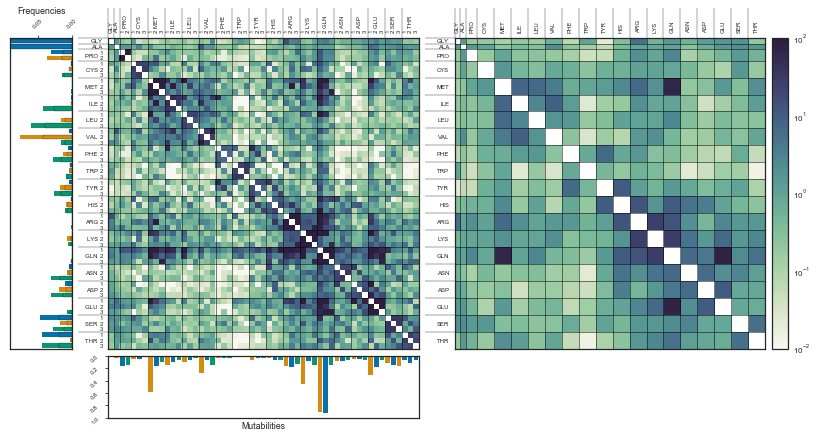

In [7]:
# older version of the RAM55 exchangeability matrix heatmap which includes
# rotamer state frequencies and mutabilities
f = open('data/umbertos_exchangibilities_readable').readlines()
f_20 = open('data/exchangabilities_20x20').readlines()
names = f[0].strip().split()

left = 0.05
bottom = 0.05
height = 0.9
width = 0.9
offset = 0.05

frequencies = [0.1190855683, 0.000574916, 0.0008325174, 0.001927108, 
               0.0053007003, 0.0080594606, 0.0314644334, 0.0099797801, 
               0.0193220378, 0.0308344174, 0.0022816439, 0.0049172624, 
               0.015209678, 5.50E-006, 2.49E-005, 0.0017176573, 4.90E-005, 
               0.0006031487, 0.0074917646, 0.116641423, 0.0021360955, 
               0.0086231265, 0.0103153095, 0.0013754839, 0.0019301623, 
               0.0421705664, 0.0005051479,
               0.0164603823, 0.0601554899, 0.0001240336, 0.0074114571, 
               0.005930519, 8.47E-005, 0.0005029695, 0.0023218044, 
               0.0056914177, 0.0136613127, 0.0285196537, 0.0310779767, 
               0.0363696328, 0.0471612835, 0.0185007591, 0.028404699, 
               0.0442627256, 0.0036916589, 0.0438422632, 0.0028387671,
               0.0044602927, 0.008833323, 0.0046852246, 0.0174120011,
               0.0266719339, 0.0045935814, 0.0759894273, 0.0169618246]
mutabilities = [0.039993243, 0.1709179985, 0.1888391699, 0.140217665, 
                0.0895625547, 0.0912810684, 0.0642837359, 0.0476353004, 
                0.050502535, 0.0682863406, 0.0517356785, 0.0571127721, 
                0.0232179486, 0.903334146, 0.9293985266, 0.1540642491, 
                0.3050022696, 0.1811484297, 0.0674267292, 0.024778491, 
                0.039444136, 0.0620481869, 0.070119554, 0.1455215374, 
                0.0985094057, 0.0612257206, 0.1091820403,
                0.0616958756, 0.0312908601, 0.4530918346, 0.083933394, 
                0.1571983294, 0.5818628719, 0.1682347326, 0.1071186728,
                0.0395856017, 0.0431862985, 0.0316002216, 0.1652789481, 
                0.1429906872, 0.1227593496, 0.1487804857, 0.1620472556,
                0.0728043423, 0.1197716789, 0.0688518315, 0.027595522, 
                0.0267043261, 0.0190272932, 0.0739639924, 0.039772976, 
                0.0398319656, 0.2823738902, 0.0626519872, 0.1451137967]

pre_correction_frequencies = [0.2812912729, 0.0002136128, 0.0002742508, 
                              0.0007151741, 0.002732013, 0.0042286327, 
                              0.0171250888, 0.0043440947, 0.008440907, 
                              0.0141311267, 0.0020108441, 0.0047925895, 
                              0.0116003098, 0.000005847, 2.2074085690221E-005, 
                              0.0013654234, 3.05161095330585E-005, 0.000344382,
                              0.0030826362, 0.3051074704, 0.0014153037, 
                              0.0057477043, 0.0072785356, 0.0009147935, 
                              0.0012341779, 0.0271056633, 0.0003412943,
                              0.0106741508, 0.039721069, 4.72194913388284E-005, 
                              0.0025053595, 0.0025339375, 5.73039322717122E-005, 
                              0.0002443095, 0.001110044, 0.0032309957, 0.0079406596, 
                              0.0162931717, 0.0135146947, 0.0155809047, 0.0189736457,
                              0.0072939743, 0.0120752968, 0.0195373561, 0.0016075814, 
                              0.0192072631, 0.0026120837, 0.003952099, 0.0076637809, 
                              0.0031213316, 0.0105557161, 0.0164920848, 0.0040193231, 
                              0.0429953096, 0.0105435951]
pre_correction_mutabilities = [0.137764883, 0.4763955098, 0.4232842257, 0.4580194746,
                               0.1616618873, 0.1780986856, 0.1842681715, 0.1053558871,
                               0.1113337951, 0.1688451462, 0.2484154469, 0.3243888815,
                               0.1056428263, 0.9269662921, 0.9449404762, 0.3039754616, 
                               0.638320775, 0.5466425029, 0.2849341197, 0.0816243005, 
                               0.1335700692, 0.1593695171, 0.2128125282, 0.2966713347,
                               0.2283083147, 0.2010504426, 0.2253128008,
                               0.1514729076, 0.1397075485, 0.5805217391, 0.2199080903, 
                               0.4323345065, 0.7712811694, 0.3741176471, 0.3184387299, 
                               0.1414076717, 0.1646665591, 0.1398292783, 0.2367370153, 
                               0.2045428432, 0.3079143753, 0.3146813781, 0.3743653217, 
                               0.2171234644, 0.2463960604, 0.2078744642, 0.1326655726, 
                               0.0985633366, 0.0721878375, 0.2551132626, 0.1513068428, 
                               0.1679983269, 0.6061294541, 0.2045937688, 0.3396525619]


OLD_ORDER = 'ARNDCQEGHILKMFPSTWYV'
OLD_NUMBERS = [1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3]

MAXIMUM = 100.0
twenty_by_twenty = np.zeros((20, 20))
for i, x in enumerate(f_20[1:]):
    first = True
    for j, y in enumerate(x.strip().split()):
        if not first:
            twenty_by_twenty[i, j-1] = min([MAXIMUM, float(y)])
            twenty_by_twenty[j-1, i] = min([MAXIMUM, float(y)])
        first = False
a_twenty = np.zeros((55, 55))
ci = 0
for i in range(20):
    cj = 0
    for j in range(20):
        for k in range(OLD_NUMBERS[i]):
            for l in range(OLD_NUMBERS[j]):
                a_twenty[ci+k, cj+l] = twenty_by_twenty[i, j]
        cj += OLD_NUMBERS[j]
    ci += OLD_NUMBERS[i]


base_indices = []
count = 0
for x in OLD_NUMBERS:
    base_indices.append(count)
    count += x
NEW_ORDER = 'STCPMILVYFWHRKNDEQAG'
NEW_ORDER = 'GAPCMILVFWYHRKNDEQST'
NEW_ORDER = 'GAPCMILVFWYHRKQEDNST'
NEW_ORDER = 'GAPCMILVFWYHRKQNDEST'


indices = []
new_base_indices = []
new_names = []
new_numbers = []
new_frequencies = []
new_pre_correction_frequencies = []
new_mutabilities = []
new_pre_correction_mutabilities = []
matric_reordering_indices = []
count = 0
for x in NEW_ORDER:
    for i, y in enumerate(OLD_ORDER):
        if x == y:
            indices.append(i)
            new_numbers.append(OLD_NUMBERS[i])
            new_base_indices.append(count)
            count += OLD_NUMBERS[i]
            for j in range(OLD_NUMBERS[i]):
                new_names.append(names[base_indices[i]+j])
                new_frequencies.append(frequencies[base_indices[i]+j])
                new_pre_correction_frequencies.append(
                    pre_correction_frequencies[base_indices[i]+j])
                new_mutabilities.append(mutabilities[base_indices[i]+j])
                new_pre_correction_mutabilities.append(
                    pre_correction_mutabilities[base_indices[i]+j])
                matric_reordering_indices.append(base_indices[i]+j)
MAXIMUM = 100.0
a = np.zeros((55, 55,))
names = f[0].strip().split()
for i, x in enumerate(f[1:]):
    first = True
    for j, y in enumerate(x.strip().split()):
        if not first:
            a[i, j-1] = min([MAXIMUM, float(y)])
            a[j-1, i] = min([MAXIMUM, float(y)])
        first = False
index = np.array(matric_reordering_indices)
a = a[index, :]
a = a[:, index]
a_twenty = a_twenty[index, :]
a_twenty = a_twenty[:, index]


fig = plt.figure(figsize=(12, 12))


axmatrix = fig.add_axes([left, bottom, width, height])


# custom sequential cmap
cmap = sb.cubehelix_palette(start=.5, rot=-.7, light=.97, as_cmap=True)
cax = axmatrix.matshow(a, interpolation='nearest', cmap=cmap,
                       norm=LogNorm(vmin=0.01, vmax=MAXIMUM), alpha=1)

divider = make_axes_locatable(axmatrix)

count = 0
new_names_again = []  # What the labels say
new_names_again_x = []
new_ticks = []  # Where the labels go
new_ticks_minor = []  # Where the line sticks out
# tick_alignment = [] # Relative positions
new_names_20 = []
new_ticks_20 = []
for x, y in zip(NEW_ORDER, new_numbers):
    new_ticks_minor.append(count-0.5)
    base = new_names[count][:3]
    new_names_20.append(base)
    if base in ['ALA', 'GLY']:
        new_ticks.append(count)
        new_ticks_20.append(count)
        new_names_again.append(base)
        new_names_again_x.append(base)
    if base == 'PRO':
        new_ticks.append(count)
        new_ticks.append(count+0.5)
        new_ticks.append(count+1)
        new_ticks_20.append(count+0.5)
        new_names_again.append(str(1))
        new_names_again.append('%s   ' % (base))
        new_names_again.append(str(2))
        new_names_again_x.append(str(1))
        new_names_again_x.append('   %s' % (base))
        new_names_again_x.append(str(2))
        
    if base not in ['ALA', 'GLY', 'PRO']:
        new_ticks.append(count)
        new_ticks.append(count+1)
        new_ticks.append(count+1)
        new_ticks.append(count+2)
        new_ticks_20.append(count+1)
        new_names_again.append(str(1))
        new_names_again.append('%s   ' % (base))
        new_names_again.append(str(2))
        new_names_again.append(str(3))
        new_names_again_x.append(str(1))
        new_names_again_x.append('   %s' % (base))
        new_names_again_x.append(str(2))
        new_names_again_x.append(str(3))

    count += y
axmatrix.set_xticks(new_ticks)
axmatrix.set_xticks(new_ticks_minor, minor=True)
axmatrix.set_yticks(new_ticks)
axmatrix.set_yticks(new_ticks_minor, minor=True)
axmatrix.tick_params(axis='x', which='major', bottom='off', top='off')
axmatrix.tick_params(axis='y', which='major', bottom='off', top='off')
axmatrix.tick_params(axis='x', which='minor',
                     direction='out', length=30, bottom='off')
axmatrix.tick_params(axis='y', which='minor',
                     direction='out', length=30, bottom='off')
axmatrix.set_xticklabels(new_names_again_x, rotation='vertical', fontsize=6)
axmatrix.set_yticklabels(new_names_again, fontsize=6)


c = 0
for i, x in enumerate(new_numbers):
    axmatrix.axvline(c-0.5, color='k', linewidth=.5)
    axmatrix.axhline(c-0.5, color='k', linewidth=.5)
    c += x

#ax_frequencies = fig.add_axes([left-offset-0.05,bottom,offset-0.005,height])
ax_frequencies = divider.append_axes("left", size="20%", pad=0.5)

#ax_frequencies = plt.subplot(gs1[1:-1, 0])
new_frequencies.reverse()
new_pre_correction_frequencies.reverse()
ax_frequencies.xaxis.tick_top()
ax_frequencies.xaxis.set_label_position('top')

palette = sb.color_palette("colorblind", 3, desat=.9)
freq_bar_colors = [palette[0] for x in range(55)]
for i, x in enumerate(new_names):
    if '2' in x:
        freq_bar_colors[i] = palette[1]
    if '3' in x:
        freq_bar_colors[i] = palette[2]
freq_bar_colors.reverse()
ax_frequencies.barh([(x+0.5) for x in range(55)], new_frequencies,
                    color=freq_bar_colors, edgecolor=['none']*55)
ax_frequencies.set_ylim(0, 55)
ax_frequencies.set_yticks([])
# ax_frequencies.set_xticks([-7.0,-9.0,-11.0,-13.0])
# ax_frequencies.set_xticklabels(['-7','-9','-11','-13'],fontsize=8,rotation=90)

ax_frequencies.set_xlim([0, 0.09])
ax_frequencies.barh([(x+0.5) for x in range(55)],
                    new_pre_correction_frequencies, edgecolor=['black']*55, color='none')
# ax_frequencies.set_xscale('log')
ax_frequencies.set_xlabel('Frequencies')  # ,fontsize=10)
plt.gca().invert_xaxis()
# ax_frequencies.set_xticks([0.00,0.03,0.06])
ax_frequencies.tick_params(axis='x', length=3, rotation=45, labelsize=6)


ax_mutabilities = divider.append_axes("bottom", size="20%", pad=0.1)

ax_mutabilities.bar([(x+0.5) for x in range(55)], new_mutabilities,
                    color=freq_bar_colors, edgecolor=['none']*55)
ax_mutabilities.set_xlim(0, 55)
ax_mutabilities.set_ylim(0, 1)
ax_mutabilities.set_xlabel('Mutabilities')
plt.gca().invert_yaxis()
ax_mutabilities.tick_params(axis='y', length=3, rotation=45, labelsize=6)
ax_mutabilities.set_xticks([])

#axmatrix20 = fig.add_axes([left+width+0.1,bottom,width,height])
ax_matrix20 = divider.append_axes("right", size="100%", pad=0.5)
cax2 = ax_matrix20.matshow(a_twenty, interpolation='nearest',
                           cmap=cmap, norm=LogNorm(vmin=0.01, vmax=MAXIMUM), alpha=1)

ax_matrix20.set_xticks(new_ticks_20)
ax_matrix20.set_xticks(new_ticks_minor, minor=True)
ax_matrix20.set_yticks(new_ticks_20)
ax_matrix20.set_yticks(new_ticks_minor, minor=True)
ax_matrix20.tick_params(axis='x', which='major', bottom='off', top='off')
ax_matrix20.tick_params(axis='y', which='major', bottom='off', top='off')
ax_matrix20.tick_params(axis='x', which='minor',
                        direction='out', length=30, bottom='off')
ax_matrix20.tick_params(axis='y', which='minor',
                        direction='out', length=30, bottom='off')
ax_matrix20.set_xticklabels(new_names_20, rotation='vertical', fontsize=6)
ax_matrix20.set_yticklabels(new_names_20, fontsize=6)

c = 0
for i, x in enumerate(new_numbers):
    ax_matrix20.axvline(c-0.5, color='k', linewidth=.5)
    ax_matrix20.axhline(c-0.5, color='k', linewidth=.5)
    c += x

ax_cbar = divider.append_axes("right", size="5%", pad=0.1)
fig.colorbar(cax, cax=ax_cbar)


fig.savefig('heatmaps.svg', format='svg', bbox_inches='tight', dpi=fig.dpi)
plt.show()